<a href="https://colab.research.google.com/github/mdabushad/Beer-Data-Analysis/blob/main/Beer_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Beer Data Analysis

In [27]:
# Importing the necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
# Load the data from the file
df = pd.read_csv("/content/drive/MyDrive/BeerDataScienceProject.tar.bz2", compression="bz2",encoding="latin-1")

In [29]:
#Display the first few rows of the DataFrame
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [30]:
#dimension of the dataframe
df.shape

(528870, 13)

In [31]:
# Prints a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [32]:
df.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


In [33]:
#Generate descriptive statistics for column
df.describe(include=['float64'])


,beer_ABV,review_appearance,review_palette,review_overall,review_taste,review_aroma
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000
mean,7.017442,3.864522,3.758926,3.833197,3.765993,3.817350
std,2.204460,0.604010,0.685335,0.709962,0.669018,0.718903
min,0.010000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,5.300000,3.500000,3.500000,3.500000,3.500000,3.500000
50%,6.500000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,8.500000,4.000000,4.000000,4.500000,4.000000,4.500000
max,57.700000,5.000000,5.000000,5.000000,5.000000,5.000000


###### We can see that for column "review_appearance" and "review_overall" min value is 0 but rating is between 1-5 for other. So, we will remove reviews with min value 0.


In [34]:
# Filter the DataFrame based on the conditions
df = df[(df.review_appearance > 0) & (df.review_overall > 0)]

In [35]:
#Check for the null values
df.isna().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

In [36]:
#Percentage of null/missing values
missing_percentage = (df.isna().sum().sum() / np.product(df.shape)) * 100
print(f"Missing Percentage: {np.round(missing_percentage,2)}%")

Missing Percentage: 0.3%


In [37]:
df.dropna(inplace = True)
print(f"Shape after dropping null: {df.shape}")

Shape after dropping null: (508355, 13)


In [38]:
#Check for the duplicate values
df.duplicated(subset = ["review_profileName", "beer_beerId"]).sum()

4658

In [39]:
#dropping the duplicate values 
df.drop_duplicates(subset = ["review_profileName", "beer_beerId"], keep = "first", inplace=True)
print(f"Shape after dropping duplicates: {df.shape}")

Shape after dropping duplicates: (503697, 13)


###Question 1 - Rank the top 3 breweries which produce the strongest beers.


In [40]:
# Calculate the average "beer_ABV" for each "beer_brewerId" group
df_avg_beer_ABV = df.groupby(by="beer_brewerId")["beer_ABV"].mean().round(2).reset_index()

# Sort the DataFrame in descending order based on "beer_ABV"
df_avg_beer_ABV = df_avg_beer_ABV.sort_values(by="beer_ABV", ascending=False)

# Rename the "beer_ABV" column to "beer_avg_ABV"
df_avg_beer_ABV = df_avg_beer_ABV.rename(columns={"beer_ABV": "beer_avg_ABV"})

# Display the first few rows of the DataFrame
df_avg_beer_ABV.head()


,beer_brewerId,beer_avg_ABV
699,6513,19.23
165,736,13.75
1466,24215,12.47
8,36,12.45
789,8540,11.75


In [41]:
df_avg_beer_ABV['Rank'] = df_avg_beer_ABV["beer_avg_ABV"].rank(method='dense', ascending = False).astype('int')
print(df_avg_beer_ABV[df_avg_beer_ABV['Rank'] <= 3])

      beer_brewerId  beer_avg_ABV  Rank
699            6513         19.23     1
165             736         13.75     2
1466          24215         12.47     3


###Question 2 - Which year did beers enjoy the highest ratings?

In [42]:
df["review_year"] = pd.to_datetime(df["review_time"], unit='s').dt.year
ratings_by_year = df.groupby(by = ["review_year"])["review_overall"].mean().rename("avg_review")
ratings_by_year.head()

review_year
1998    4.045455
1999    4.000000
2000    4.241379
2001    3.959357
2002    3.818745
Name: avg_review, dtype: float64

In [43]:
reviews_count_by_year = df.groupby(by = ["review_year"])["review_overall"].size().rename("count_review")
reviews_count_by_year.head()


review_year
1998      11
1999      10
2000      29
2001     529
2002    6695
Name: count_review, dtype: int64

In [44]:
merged_df = pd.merge(ratings_by_year, reviews_count_by_year, on = 'review_year', how = 'inner')
merged_df.head()

,avg_review,count_review
review_year,,
1998,4.045455,11
1999,4.000000,10
2000,4.241379,29
2001,3.959357,529
2002,3.818745,6695


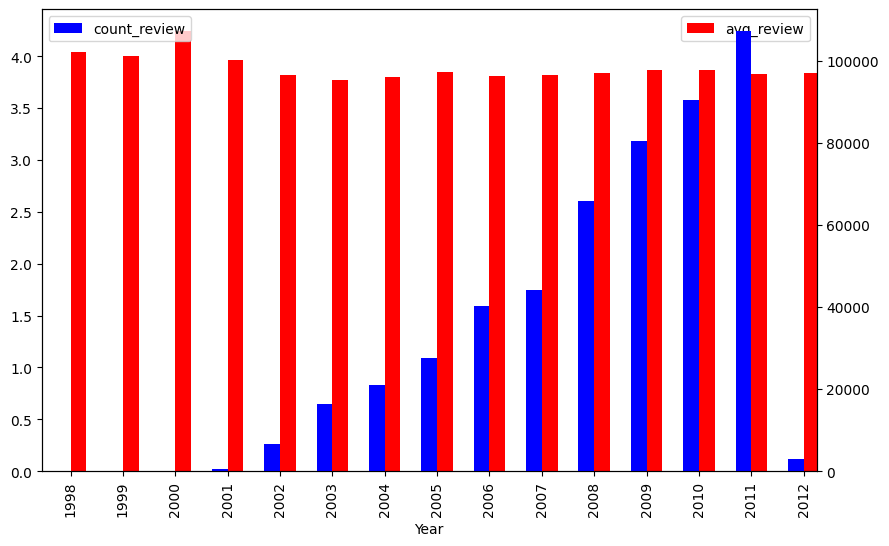

In [45]:
# Create a new figure with a specified size
figure = plt.figure(figsize=(10, 6))

# Add a subplot to the figure
ax1 = figure.add_subplot(111)

# Create a twin axes sharing the x-axis with ax1
ax2 = ax1.twinx()

# Plot the "avg_review" column as a bar chart on ax1
merged_df.plot(y="avg_review", kind="bar", color="r", ax=ax1, position=0, width=0.3)

# Plot the "count_review" column as a bar chart on ax2
merged_df.plot(y="count_review", kind="bar", color="b", ax=ax2, position=1, width=0.3)

# Set the x-label for ax1
ax1.set_xlabel("Year")

# Add a legend to the plot
plt.legend(loc="upper left")

# Display the plot
plt.show()


#####We can observe that for the year 2000, we have the average review score, but the review count is insufficient to make a reliable judgment as the sample size is small and the mean may not be robust. Therefore, we will consider the year 2010, where we have sufficient information to declare it as the highest-rated year for breweries.

###Question 3 - Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?

In [46]:
df_factors = df.groupby(by="beer_beerId")[["review_appearance", "review_palette", "review_taste", "review_aroma", "review_overall"]].mean()
df_factors.head()

,review_appearance,review_palette,review_taste,review_aroma,review_overall
beer_beerId,,,,,
5,3.488095,3.208333,3.323810,3.342857,3.554762
6,3.839839,3.515499,3.513777,3.644087,3.707807
7,3.250382,3.177099,3.107634,3.101527,3.269466
8,3.294118,3.080882,3.301471,3.235294,3.647059
9,3.051724,2.853448,3.103448,3.043103,3.400862


In [47]:
#Calculating the Correlation matrix
correlation_matrix = df_factors.corr()
correlation_matrix



,review_appearance,review_palette,review_taste,review_aroma,review_overall
review_appearance,1.000000,0.669255,0.682221,0.660205,0.637643
review_palette,0.669255,1.000000,0.756162,0.826155,0.767050
review_taste,0.682221,0.756162,1.000000,0.835162,0.823299
review_aroma,0.660205,0.826155,0.835162,1.000000,0.883899
review_overall,0.637643,0.767050,0.823299,0.883899,1.000000


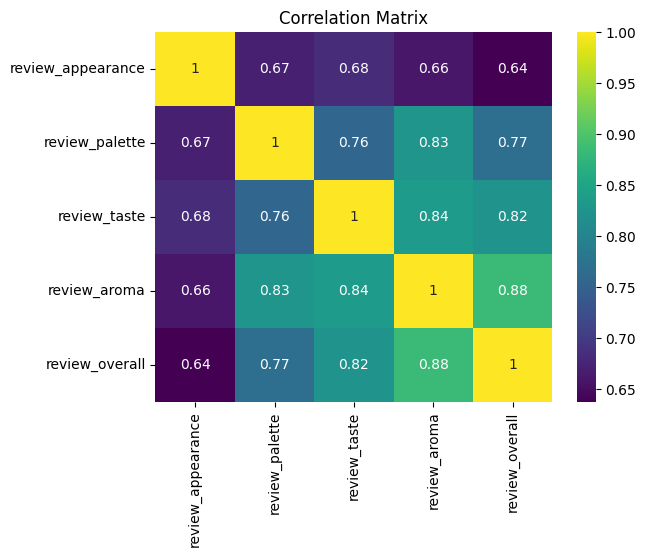

In [49]:
# Visualize correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

####From heatmap we can see that correlation coefficient for review_aroma(0.88) is highest, it means it is the most important factor based on user ratings.